In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### 1. Load Wine dataset (scikit library)

In [2]:
data = load_wine()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### 2. Select the first two attributes for a 2D representation of the image.

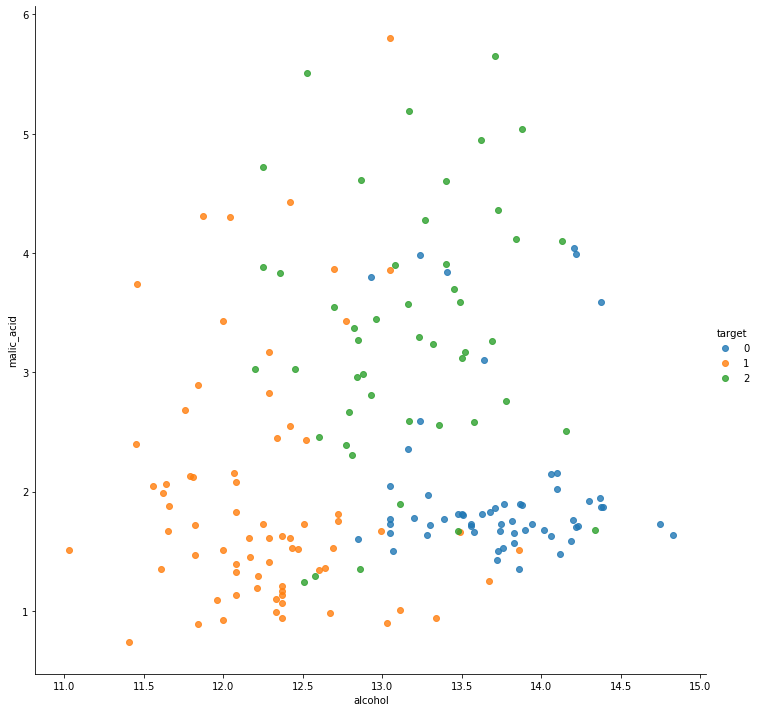

In [3]:
df_splitted = df[['alcohol','malic_acid', 'target']]

sns.lmplot('alcohol', 'malic_acid', hue='target', data=df_splitted, height=10,  fit_reg=False)

### 3. Randomly split data into train, validation and test sets in proportion 5:2:3

KNN on 2-dimensional data
Train data


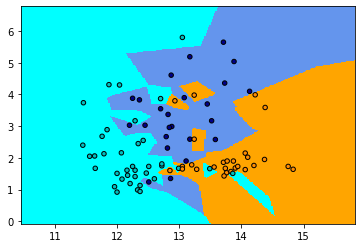

Evaluation data


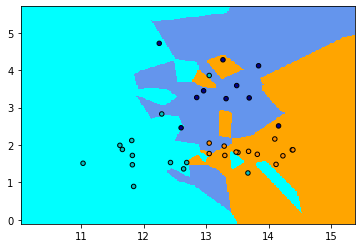

Predicted


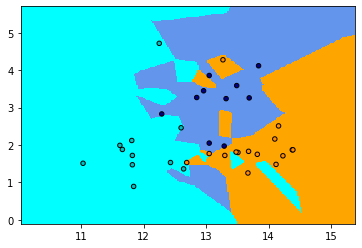

3-Class classification (k = 1)
Accuracy: 0.7222222222222222







Train data


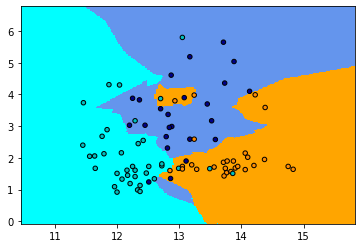

Evaluation data


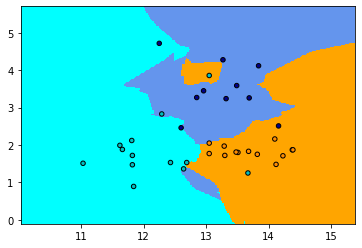

Predicted


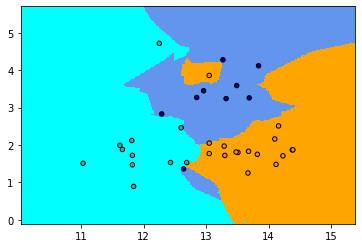

3-Class classification (k = 3)
Accuracy: 0.8055555555555556







Train data


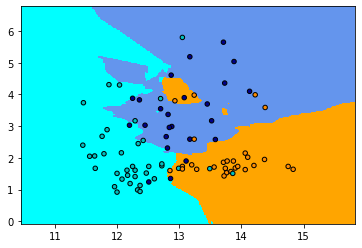

Evaluation data


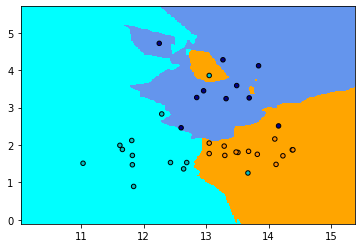

Predicted


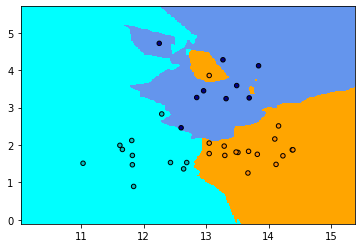

3-Class classification (k = 5)
Accuracy: 0.9166666666666666







Train data


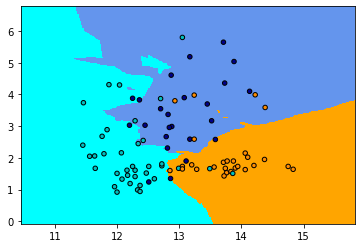

Evaluation data


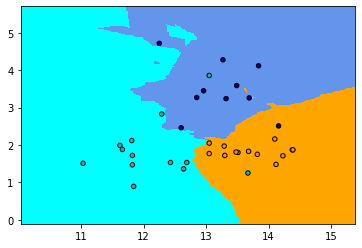

Predicted


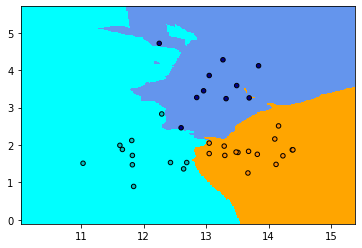

3-Class classification (k = 7)
Accuracy: 0.9166666666666666







- - - - - - - - - - - -
KNN on multidimensional data
3-Class classification (k = 1)
Accuracy: 0.75







3-Class classification (k = 3)
Accuracy: 0.75







3-Class classification (k = 5)
Accuracy: 0.6666666666666666







3-Class classification (k = 7)
Accuracy: 0.6666666666666666







- - - - - - - - - - - -


In [128]:
# 2-dimensional data

print("KNN on 2-dimensional data")

X = data.data[:,0:2]
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

validation_size = 0.2 / 0.7

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size, random_state=42)

accuracy_2D = run_knn()

# - - - - - - -
# Multidimensional data

print("KNN on multidimensional data")

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

validation_size = 0.2 / 0.7

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size, random_state=42)

accuracy_MD = run_knn()

### 4. For K = [1,3, 5,7]:
####      a. Apply K-Nearest Neighbors
####      b. Plot the data and the decision boundaries 
####      c. Evaluate the method on the validation set

In [127]:
def run_knn(K = [1,3,5,7]):
    accuracy = {}
    twoDimension = False
    
    #KNN running on 2D data
    if (X.shape[1] == 2):
        twoDimension = True

    for k in K:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        y_pred = knn.predict(X_val)
        
        if (twoDimension == True):
            print("Train data")
            plot_data_and_decision_boundary(knn, X_train, y_train)
            
            print("Evaluation data")
            plot_data_and_decision_boundary(knn, X_val, y_val)
            
            print("Predicted")
            plot_data_and_decision_boundary(knn, X_val, y_pred)
            
            plt.show()

        print("3-Class classification (k = %i)" % (k))
        print("Accuracy: " + str(accuracy_score(y_val, y_pred)))
        print("\n\n\n\n\n\n")
        
        if (twoDimension == True):
            accuracy[k] = accuracy_score(y_val, y_pred)
        
    
    print("- - - - - - - - - - - -")
    return accuracy

In [126]:
def plot_data_and_decision_boundary(knn, X, y):
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
    h = .02  # step size in the mesh
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

### 5. Plot a graph showing how the accuracy on the validation set varies when changing K

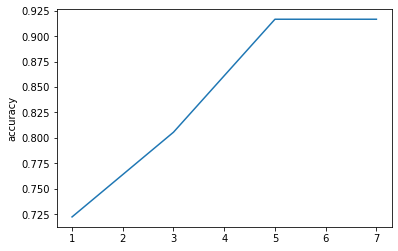

In [103]:
accuracy_df = pd.DataFrame.from_dict(accuracy_2D, orient='index', columns=["accuracy"])

sns.lineplot(x=accuracy_df.index, y="accuracy",data=accuracy_df)

### 6. How the boundaries change? Why?

In [ ]:
# --- 

### 7. Use the best value of K and evaluate the model on the test set.
#### How well does it works?

KNN on 2-dimensional data on test with best K (5) found
3-Class classification (k = 5)
Accuracy: 0.7777777777777778



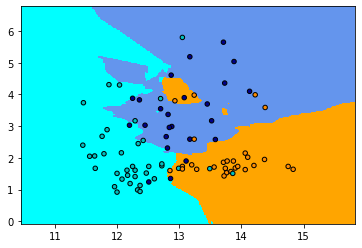

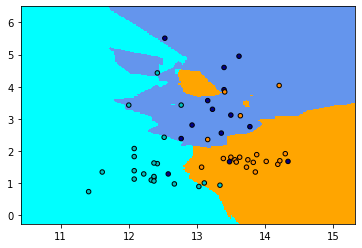

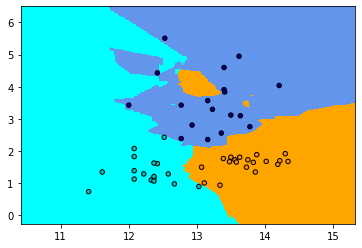

In [121]:
best_k = max(accuracy_2D, key=accuracy_2D.get)

# 2-dimensional data
print("KNN on 2-dimensional data on test with best K (" + str(best_k) + ") found")

X = data.data[:,0:2]
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

validation_size = 0.2 / 0.7

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_size, random_state=42)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("3-Class classification (k = %i)" % (best_k))
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
print()

plot_data_and_decision_boundary(knn, X_train, y_train)
plot_data_and_decision_boundary(knn, X_test, y_test)
plot_data_and_decision_boundary(knn, X_test, y_pred)




### 8. For C = [0.001, 0.01, 0.1, 1, 10, 100,1000]: 
#### a. Train a linear SVM on the training set
#### b. Plot the data and the decision boundaries 
#### c. Evaluate the method on the validation set